CS109 Final Project

Rosan Bishwakarma, Rudra Barua, Albert Zhang, Jeremy Zhang

Group 69

In [ ]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [ ]:
import random
random_seed = 0
random.seed(random_seed)

import os
import sys

import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score
)                           
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

%matplotlib inline

# RUN THIS CELL
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline
pd.set_option('display.width', 1000)

In [ ]:
mortality = pd.read_csv("Project_B_NHANESI_full.csv")
np.random.seed(random_seed)

# college_train, college_test = train_test_split(
#     college,
#     test_size=0.2,
#     random_state=random_seed,
#     shuffle=True,
#     stratify=college["school"],
# )
print(mortality.shape)
# print(college_train.shape, college_test.shape)

(14407, 42)


In [ ]:
display(mortality.head())

,sequence_ID,sex_isFemale,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,platelets_estimate,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_albumin,urine_glucose,urine_pH,urine_hematest,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y
0,20751,False,1,NaN,51,NaN,85.0,NaN,16.0,10.1,1.0,4.1,140.0,0.5,NaN,5.48,10.1,16.0,49.0,Normal,70.0,26.0,1.0,3.0,0.0,0.0,256.0,NaN,182.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,6.2,110.0,40.0,84.25,182.1,-16.952
1,20753,False,1,NaN,41,NaN,68.0,2.27,16.0,10.2,0.9,4.4,142.0,0.9,NaN,4.62,6.3,14.1,42.0,Normal,54.0,35.0,2.0,8.0,1.0,0.0,254.0,NaN,159.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,7.7,136.0,54.0,87.09,188.2,-17.200
2,20754,True,3,NaN,31,NaN,61.0,1.86,10.0,9.6,0.6,3.9,139.0,0.3,NaN,4.26,7.8,12.0,38.0,Normal,56.0,37.0,2.0,5.0,0.0,0.0,177.0,NaN,160.0,NaN,NaN,Negative,Negative,6.0,Negative,NaN,4.9,110.0,24.0,60.21,159.2,-17.630
3,20755,False,1,NaN,48,NaN,58.0,NaN,12.0,9.7,1.1,4.2,142.0,0.8,NaN,4.71,5.1,12.7,40.0,Normal,54.0,33.0,4.0,8.0,1.0,0.0,209.0,NaN,153.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,8.4,126.0,36.0,88.22,175.6,-17.271
4,20756,True,1,NaN,29,NaN,37.0,1.69,19.0,9.3,1.1,4.2,140.0,0.7,NaN,4.23,5.2,12.3,40.0,Normal,65.0,34.0,1.0,0.0,0.0,0.0,206.0,NaN,156.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,4.3,98.0,36.0,51.37,163.5,-17.132


In [ ]:
display(mortality.describe())

,sequence_ID,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_pH,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y
count,14407.000,14407.000,11348.000,14407.000,10801.000,6364.000,6315.000,2935.000,6256.000,2591.000,2992.000,3003.000,5854.000,10800.000,10513.000,12959.000,13373.000,13631.000,5854.000,5854.000,5854.000,5854.000,5854.000,5854.000,13970.000,9943.000,13814.000,10149.000,9932.000,13695.000,10308.000,6651.000,14339.000,14335.000,14338.000,14361.000,14407.000
mean,13109.294,1.174,285.289,48.945,4.360,60.204,2.429,14.807,9.671,1.008,4.069,142.368,0.514,7.106,4.719,7.475,14.370,42.741,58.232,36.207,3.156,2.015,0.131,0.251,220.819,101.122,168.370,362.766,28.556,5.631,16.182,5.527,134.170,50.667,70.994,166.255,-9.110
std,7376.748,0.408,223.321,15.590,0.329,25.888,1.490,4.463,0.479,0.284,0.344,3.114,0.257,0.511,0.485,2.207,1.505,3.997,9.974,9.876,2.681,2.084,0.393,1.090,48.441,37.247,14.331,59.969,11.233,0.774,11.482,1.470,24.412,18.028,15.751,9.175,14.398
min,1.000,1.000,2.000,25.000,2.700,4.800,0.270,0.800,0.200,0.400,2.700,121.000,0.100,4.400,2.140,2.100,5.000,19.000,2.000,3.000,0.000,0.000,0.000,0.000,53.000,17.000,82.000,112.000,3.200,5.000,1.000,0.700,80.000,10.000,27.900,132.800,-22.060
25%,6711.500,1.000,129.000,35.000,4.200,45.000,1.800,12.000,9.400,0.900,3.800,141.000,0.380,6.800,4.390,6.000,13.300,40.000,52.000,30.000,1.000,0.000,0.000,0.000,187.000,75.000,159.000,322.000,21.000,5.000,7.000,4.500,118.000,38.000,59.530,159.500,-19.885
50%,13313.000,1.000,229.000,48.000,4.400,57.000,2.200,14.000,9.700,1.000,4.100,143.000,0.500,7.100,4.700,7.200,14.300,43.000,58.000,36.000,3.000,1.000,0.000,0.000,217.000,96.000,168.000,356.000,27.200,5.000,14.000,5.400,130.000,48.000,69.170,165.500,-18.028
75%,19835.500,1.000,358.000,65.000,4.600,70.000,2.600,17.000,10.000,1.100,4.300,144.000,0.600,7.400,5.030,8.600,15.400,45.000,65.000,42.000,5.000,3.000,0.000,0.000,249.000,122.000,177.000,396.000,34.600,6.000,22.000,6.500,148.000,60.000,80.290,172.700,6.179
max,25061.000,3.000,999.000,75.000,5.700,580.000,31.000,49.000,12.500,9.000,5.400,157.000,5.200,13.300,6.990,56.000,22.400,68.000,94.000,95.000,20.000,17.000,3.000,22.000,793.000,396.000,289.000,717.000,100.000,9.000,72.000,12.500,270.000,170.000,181.440,205.000,21.474


In [ ]:
display(mortality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14407 entries, 0 to 14406
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sequence_ID                  14407 non-null  int64  
 1   sex_isFemale                 14407 non-null  bool   
 2   race                         14407 non-null  int64  
 3   poverty_index                11348 non-null  float64
 4   age                          14407 non-null  int64  
 5   serum_albumin                10801 non-null  float64
 6   alkaline_phosphatase         6364 non-null   float64
 7   SGOT                         6315 non-null   float64
 8   BUN                          2935 non-null   float64
 9   calcium                      6256 non-null   float64
 10  creatinine                   2591 non-null   float64
 11  potassium                    2992 non-null   float64
 12  sodium                       3003 non-null   float64
 13  total_bilirubin 

None

In [ ]:
# You'll need to install missingno the first time you run this notebook
!pip install missingno

''

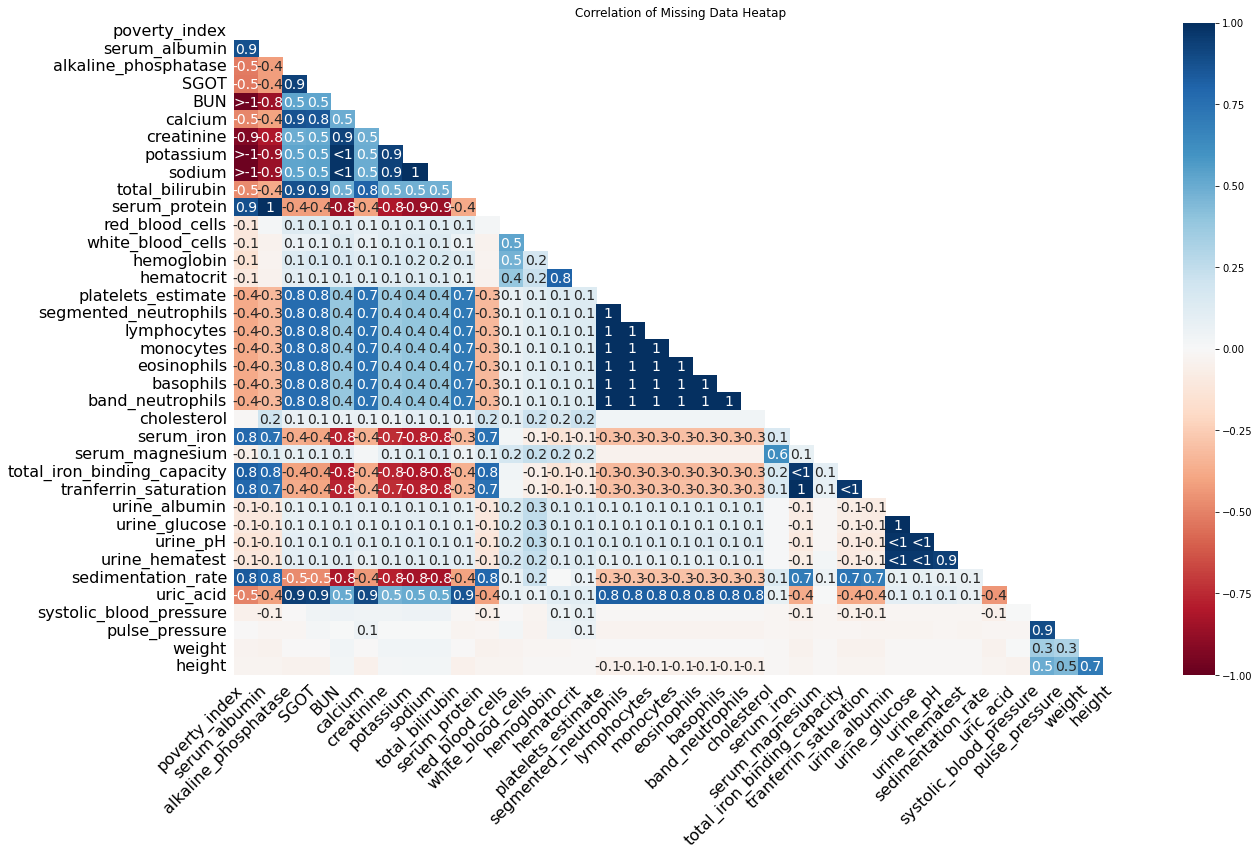

In [ ]:
import missingno as msno
msno.heatmap(mortality.sample(500)).set(title='Correlation of Missing Data Heatap')
;

In [ ]:
mortality_datatypes = pd.DataFrame(mortality.dtypes)
mortality_null_count = mortality.count()
print(mortality_datatypes.to_latex())
print(mortality_null_count.to_latex())

\begin{tabular}{ll}
\toprule
{} &        0 \\
\midrule
sequence\_ID                 &    int64 \\
sex\_isFemale                &     bool \\
race                        &    int64 \\
poverty\_index               &  float64 \\
age                         &    int64 \\
serum\_albumin               &  float64 \\
alkaline\_phosphatase        &  float64 \\
SGOT                        &  float64 \\
BUN                         &  float64 \\
calcium                     &  float64 \\
creatinine                  &  float64 \\
potassium                   &  float64 \\
sodium                      &  float64 \\
total\_bilirubin             &  float64 \\
serum\_protein               &  float64 \\
red\_blood\_cells             &  float64 \\
white\_blood\_cells           &  float64 \\
hemoglobin                  &  float64 \\
hematocrit                  &  float64 \\
platelets\_estimate          &   object \\
segmented\_neutrophils       &  float64 \\
lymphocytes                 &  float64 \\
monocyte

In [ ]:
column_info = pd.concat([pd.DataFrame(mortality.dtypes), mortality.count()], axis=1)
display(column_info)
print(column_info.to_latex())

,0,0
sequence_ID,int64,14407
sex_isFemale,bool,14407
race,int64,14407
poverty_index,float64,11348
age,int64,14407
serum_albumin,float64,10801
alkaline_phosphatase,float64,6364
SGOT,float64,6315
BUN,float64,2935
calcium,float64,6256


\begin{tabular}{llr}
\toprule
{} &        0 &      0 \\
\midrule
sequence\_ID                 &    int64 &  14407 \\
sex\_isFemale                &     bool &  14407 \\
race                        &    int64 &  14407 \\
poverty\_index               &  float64 &  11348 \\
age                         &    int64 &  14407 \\
serum\_albumin               &  float64 &  10801 \\
alkaline\_phosphatase        &  float64 &   6364 \\
SGOT                        &  float64 &   6315 \\
BUN                         &  float64 &   2935 \\
calcium                     &  float64 &   6256 \\
creatinine                  &  float64 &   2591 \\
potassium                   &  float64 &   2992 \\
sodium                      &  float64 &   3003 \\
total\_bilirubin             &  float64 &   5854 \\
serum\_protein               &  float64 &  10800 \\
red\_blood\_cells             &  float64 &  10513 \\
white\_blood\_cells           &  float64 &  12959 \\
hemoglobin                  &  float64 &  13373 \\
hemato

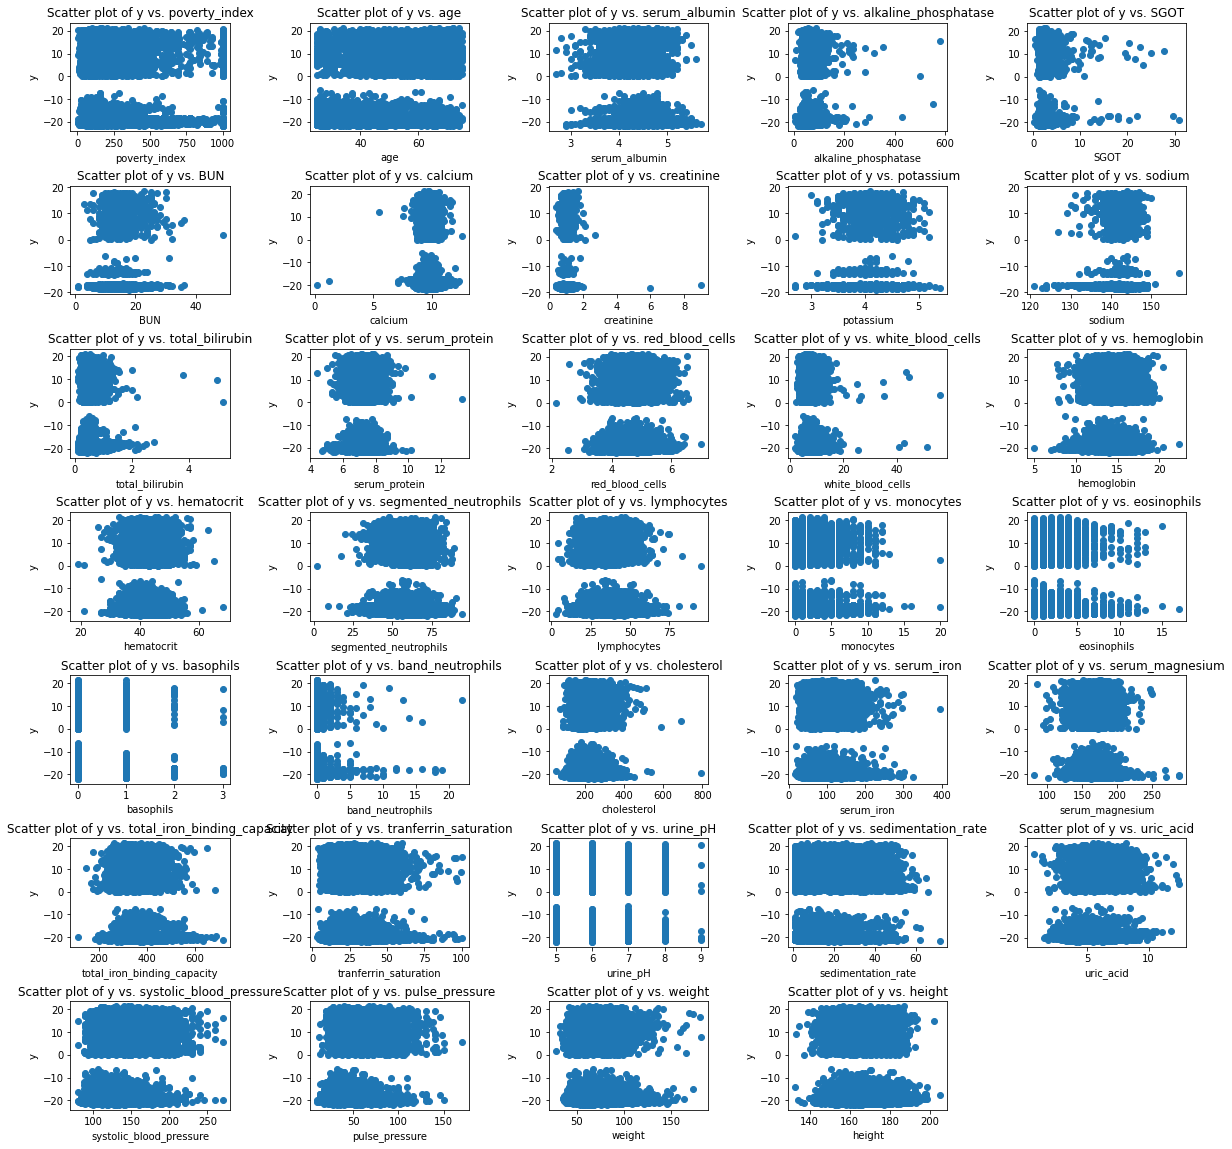

In [ ]:
# Numerical predictors
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']
# y
y = mortality['y']
# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
# Put space between plots
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
# Go through each numertical predictor
for i, pred in enumerate(numerical):
    # Create a scatter plot of that predictor against y
    axes[i].scatter(x = mortality[pred], y = y)
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Scatter plot of y vs. {pred}')
# Delete the extra blank plot
fig.delaxes(axes[i+1])

plt.show()


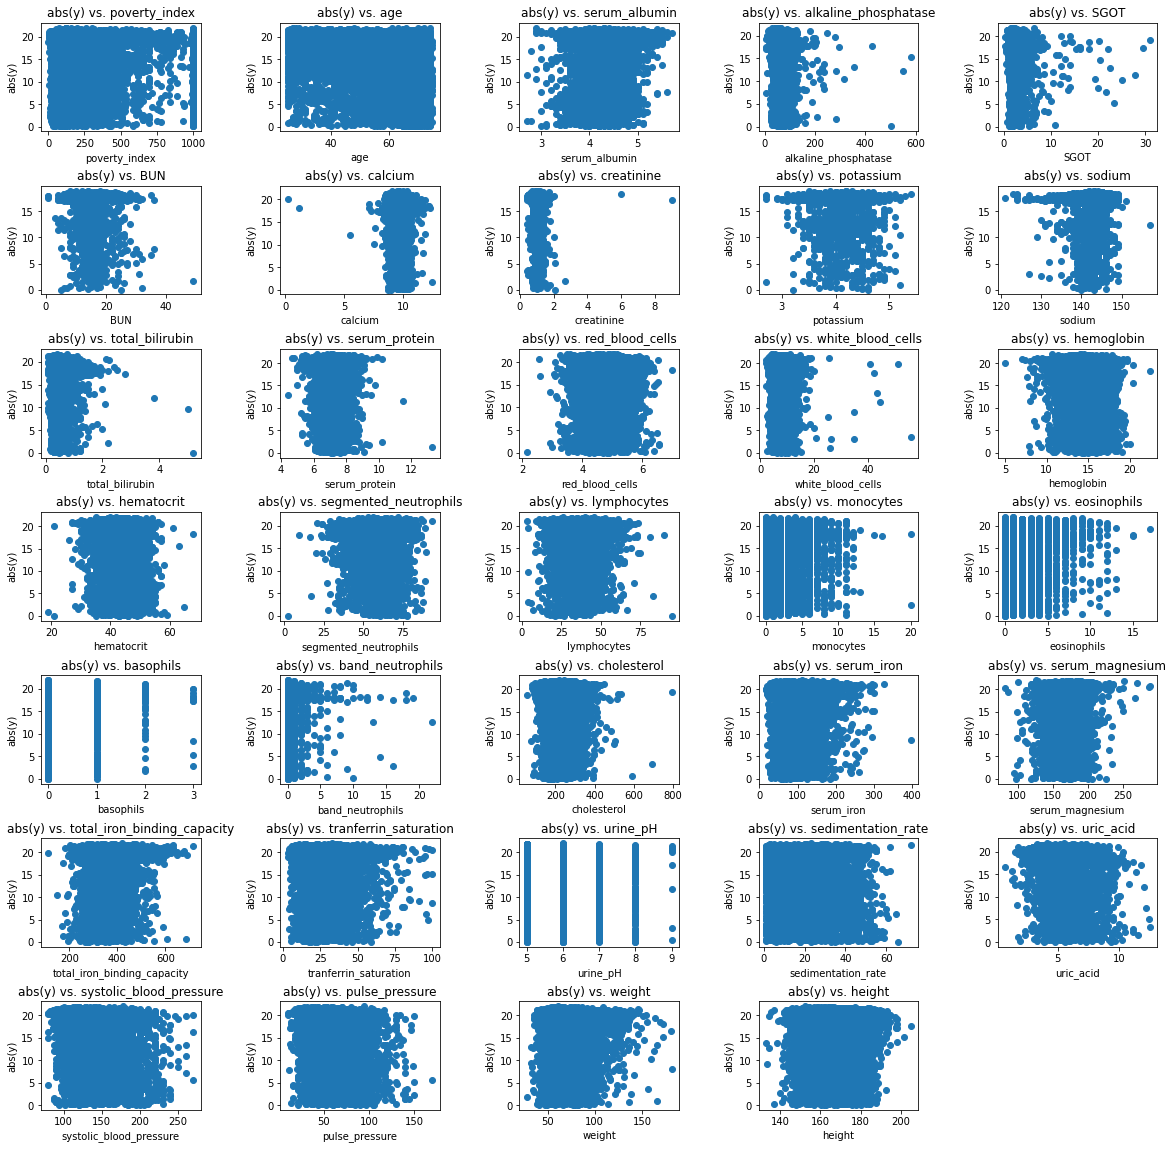

In [ ]:
# Numerical predictors
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']
# Absolute value of y
y_abs = abs(mortality['y'])
mortality['abs_y'] = y_abs
# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
# Put space between plots
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
# Go through each numertical predictor
for i, pred in enumerate(numerical):
    # Create a scatter plot of that predictor against y
    axes[i].scatter(x = mortality[pred], y = y_abs)
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('abs(y)')
    axes[i].set_title(f'abs(y) vs. {pred}')
# Delete the extra blank plot
fig.delaxes(axes[i+1])

plt.show()


In [ ]:
# Get the categorical columns
categorical = mortality.drop(columns=numerical+['sequence_ID','y']).columns
print(categorical)

Index(['sex_isFemale', 'race', 'platelets_estimate', 'urine_albumin', 'urine_glucose', 'urine_hematest', 'abs_y'], dtype='object')


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


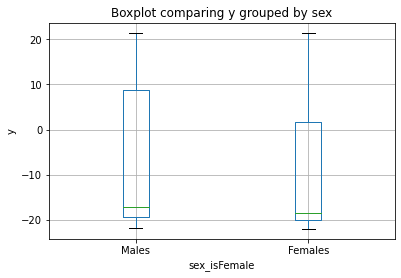

In [ ]:
# Create a boxplot comparing years survived since the initial examination till death
# Grouped by males and females
axes = mortality.boxplot(column='y', by='sex_isFemale', return_type='axes')
axes[0].set_ylabel('y')
axes[0].set_xticklabels(['Males', 'Females'])
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by sex')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


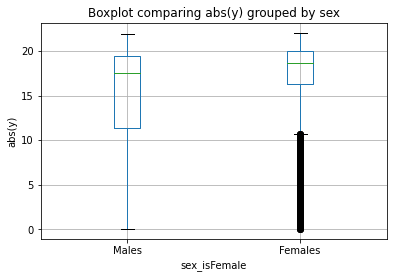

In [ ]:
# Create a boxplot comparing absolute years survived since the initial examination till death
# Grouped by males and females
axes = mortality.boxplot(column='abs_y', by='sex_isFemale', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].set_xticklabels(['Males', 'Females'])
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by sex')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


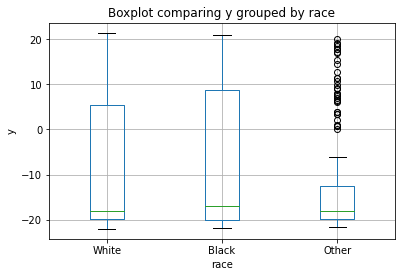

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by white, black, other, and unknown
axes = mortality.boxplot(column='y', by='race', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_xticklabels(['White', 'Black', 'Other'])
axes[0].set_title('Boxplot comparing y grouped by race')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


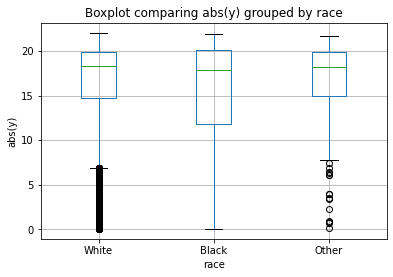

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by white, black, other, and unknown
axes = mortality.boxplot(column='abs_y', by='race', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_xticklabels(['White', 'Black', 'Other'])
axes[0].set_title('Boxplot comparing abs(y) grouped by race')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


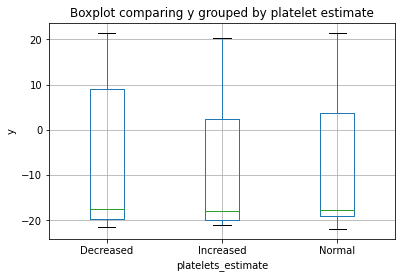

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by decreased platelet estimate, increased platelet estimate, and normal platelet estimte
axes = mortality.boxplot(column='y', by='platelets_estimate', return_type='axes')
axes[0].get_figure().suptitle('')
axes[0].set_ylabel('y')
axes[0].set_title('Boxplot comparing y grouped by platelet estimate')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


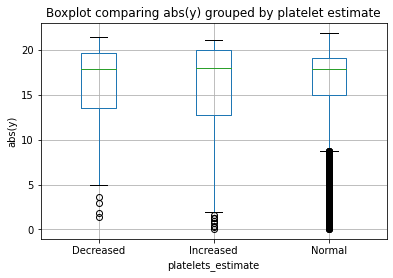

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by decreased platelet estimate, increased platelet estimate, and normal platelet estimte
axes = mortality.boxplot(column='abs_y', by='platelets_estimate', return_type='axes')
axes[0].get_figure().suptitle('')
axes[0].set_ylabel('abs(y)')
axes[0].set_title('Boxplot comparing abs(y) grouped by platelet estimate')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


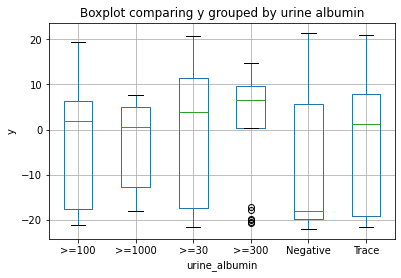

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine albumin levels
axes = mortality.boxplot(column='y', by='urine_albumin', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine albumin')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


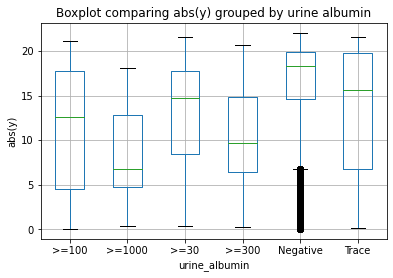

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine albumin levels
axes = mortality.boxplot(column='abs_y', by='urine_albumin', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine albumin')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


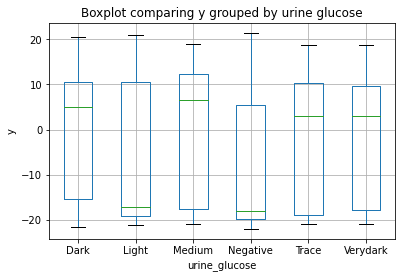

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine glucose levels
axes = mortality.boxplot(column='y', by='urine_glucose', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine glucose')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


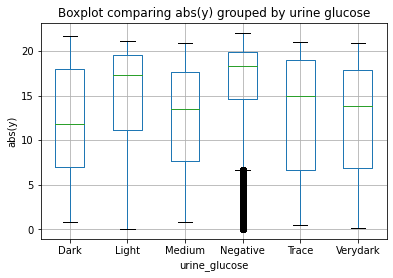

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine glucose levels
axes = mortality.boxplot(column='abs_y', by='urine_glucose', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine glucose')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


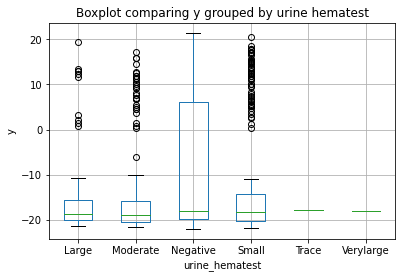

In [ ]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine hematest levels
axes = mortality.boxplot(column='y', by='urine_hematest', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine hematest')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


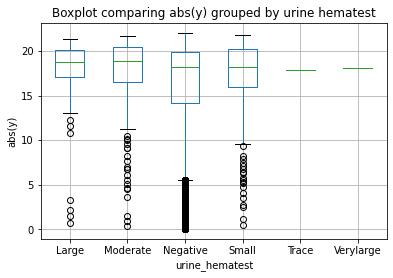

In [ ]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine hematest levels
axes = mortality.boxplot(column='abs_y', by='urine_hematest', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine hematest')
plt.show()

In [ ]:
#pairplot (takes 15min to finish)
# Creates a scatterplot for each pair of numerical predictors
# sns.pairplot(mortality[numerical], corner=True)

In [ ]:
# List to store combinations of predictors/response
pred_combos = []
# Get correlation matrix
correlations = mortality.corr()
# Get all the column names in our correlation matrix
column_names = correlations.columns
count = 0
# Go through each colmn
for i in range(len(column_names)):
    col = column_names[i]
    for j in range(i,len(column_names)):
        row = column_names[j]
        # Check if the correlation between the response and predictor
        # or correlation between two predictors is above 0.6
        if abs(correlations[row][col]) > 0.6 and col != row:
            # Store that combination and correlation
            pred_combos.append((row, col, correlations[row][col]))
display(correlations)

,sequence_ID,sex_isFemale,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_pH,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y,abs_y
sequence_ID,1.000,-0.023,-1.492e-01,-0.021,-0.075,0.010,0.070,3.783e-02,0.022,0.019,6.171e-02,-0.032,-2.023e-01,0.208,-0.093,0.071,3.055e-02,-6.770e-02,-0.071,-0.005,-6.426e-02,0.273,-4.009e-02,0.110,-7.278e-03,-0.003,-0.022,6.451e-02,0.004,-0.026,-2.088e-01,-0.264,0.034,-7.592e-02,-1.107e-01,0.014,0.059,-9.111e-02,-0.056
sex_isFemale,-0.023,1.000,1.647e-02,-0.064,-0.136,-0.118,-0.080,-1.650e-01,-0.245,-0.076,-3.395e-01,-0.140,-8.127e-02,-0.234,0.002,-0.454,-2.578e-02,-5.654e-01,-0.551,0.001,3.555e-02,-0.060,-9.066e-02,-0.007,-3.576e-03,0.005,-0.108,-8.559e-02,0.180,-0.165,2.909e-02,0.272,-0.465,-8.259e-02,-1.526e-02,-0.346,-0.674,-1.619e-01,0.187
race,-0.149,0.016,1.000e+00,-0.152,-0.008,-0.088,0.034,7.269e-02,-0.075,0.030,-1.688e-02,-0.004,9.604e-05,-0.056,0.219,-0.075,-1.008e-01,-1.759e-01,-0.120,-0.163,1.779e-01,-0.038,8.324e-03,-0.026,-3.496e-02,-0.017,-0.076,-1.360e-01,-0.021,-0.063,3.069e-02,0.181,0.064,9.968e-02,5.192e-02,0.045,-0.050,5.189e-02,-0.056
poverty_index,-0.021,-0.064,-1.517e-01,1.000,-0.038,0.073,-0.058,-2.153e-02,NaN,-0.007,NaN,NaN,NaN,0.022,-0.097,0.043,5.866e-03,8.699e-02,0.068,0.024,-2.819e-02,0.021,9.045e-03,-0.009,-1.485e-02,0.019,0.088,3.759e-02,-0.022,0.086,2.477e-03,-0.130,0.011,-9.401e-02,-7.972e-02,-0.019,0.110,-7.689e-02,0.100
age,-0.075,-0.136,-7.883e-03,-0.038,1.000,-0.208,0.194,3.988e-02,0.339,-0.049,1.413e-01,0.090,5.840e-02,-0.047,-0.039,0.021,-7.152e-02,7.415e-02,0.102,0.014,-7.539e-03,-0.029,1.684e-02,-0.030,-1.710e-02,0.347,-0.017,7.878e-02,-0.252,0.081,-5.962e-02,0.202,0.145,5.059e-01,4.999e-01,0.038,-0.121,5.540e-01,-0.453
serum_albumin,0.010,-0.118,-8.802e-02,0.073,-0.208,1.000,-0.101,2.728e-02,NaN,0.370,NaN,NaN,NaN,0.121,0.445,0.203,1.038e-02,2.508e-01,0.217,-0.016,6.014e-03,0.068,-3.178e-02,0.021,1.511e-02,0.068,0.112,1.684e-01,0.126,0.044,1.587e-02,-0.254,0.119,-6.357e-02,-9.877e-02,0.026,0.126,-1.462e-01,0.171
alkaline_phosphatase,0.070,-0.080,3.396e-02,-0.058,0.194,-0.101,1.000,1.746e-01,0.028,0.006,4.410e-02,0.040,-5.335e-03,0.106,0.102,0.075,7.619e-02,7.219e-02,0.086,0.042,-5.759e-02,0.049,7.420e-03,0.012,3.219e-03,0.103,-0.027,1.227e-02,-0.018,-0.017,-2.009e-02,0.133,0.134,1.770e-01,1.383e-01,0.107,-0.014,1.760e-01,-0.177
SGOT,0.038,-0.165,7.269e-02,-0.022,0.040,0.027,0.175,1.000e+00,0.057,0.065,4.323e-02,0.006,2.512e-02,0.203,0.142,0.075,6.614e-03,1.177e-01,0.123,-0.031,2.292e-02,0.035,-1.149e-02,0.023,-7.797e-04,0.030,0.165,-6.169e-02,0.036,0.135,-1.937e-02,0.004,0.190,9.112e-02,3.933e-02,0.095,0.111,8.978e-02,-0.089
BUN,0.022,-0.245,-7.466e-02,NaN,0.339,NaN,0.028,5.695e-02,1.000,0.074,3.154e-01,0.123,9.648e-02,0.037,NaN,0.114,-2.731e-02,1.326e-01,0.126,-0.027,-1.842e-03,0.064,7.203e-02,-0.004,-3.611e-02,0.170,NaN,9.651e-02,NaN,NaN,-6.045e-02,NaN,0.286,1.710e-01,1.472e-01,0.169,0.104,1.294e-01,-0.122
calcium,0.019,-0.076,2.961e-02,-0.007,-0.049,0.370,0.006,6.522e-02,0.074,1.000,7.793e-02,0.061,1.805e-01,0.091,0.288,0.183,8.797e-02,1.843e-01,0.176,-0.026,2.161e-02,0.023,-1.213e-02,0.006,-2.226e-03,0.169,0.054,7.743e-02,0.161,-0.027,1.911e-02,-0.054,0.129,4.367e-02,-8.637e-03,0.050,0.068,-8.853e-03,-0.003


Correlation of sex_isFemale vs height: -0.6740098473164745
Correlation of red_blood_cells vs hemoglobin: 0.6997393116618635
Correlation of red_blood_cells vs hematocrit: 0.7444551216146654
Correlation of hemoglobin vs hematocrit: 0.9154147576551465
Correlation of segmented_neutrophils vs lymphocytes: -0.9253751215513111
Correlation of serum_iron vs tranferrin_saturation: 0.9055657333870066
Correlation of systolic_blood_pressure vs pulse_pressure: 0.8520625460846935
Correlation of y vs abs_y: -0.6170634939773824


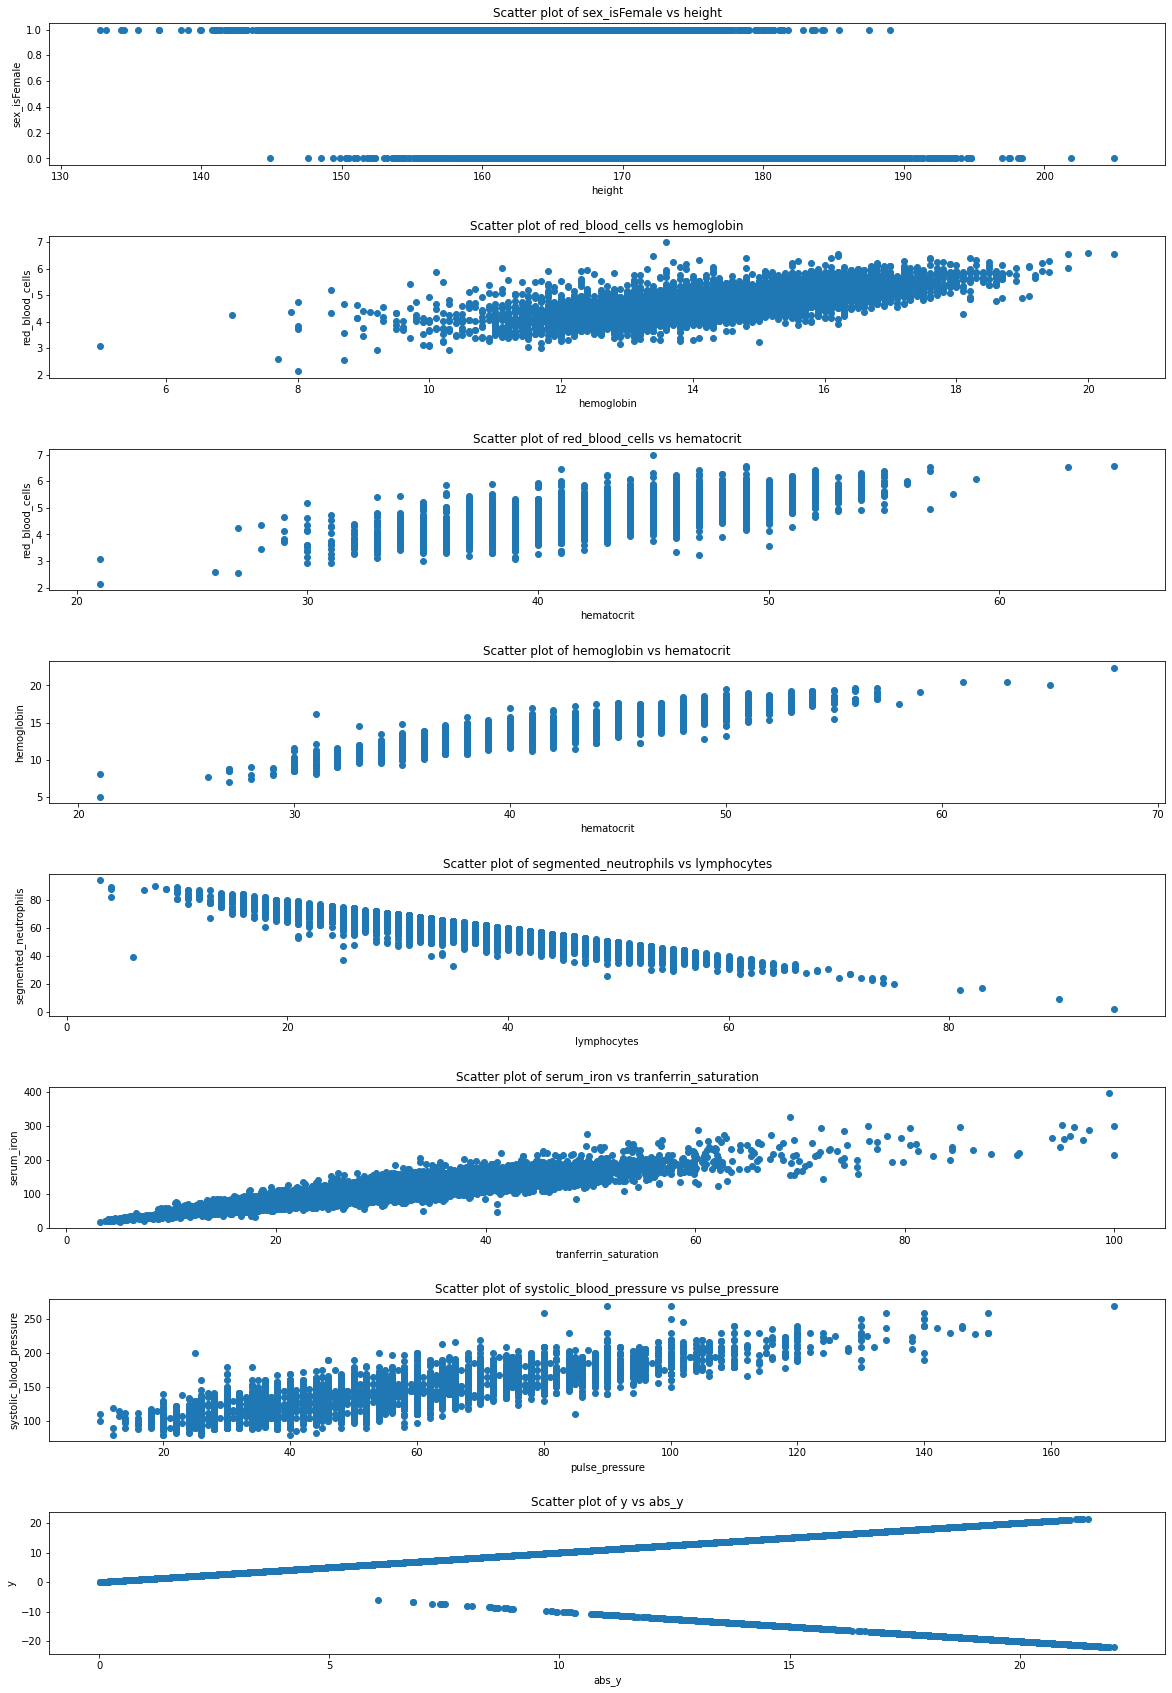

In [ ]:
# Create plots
fig, axes = plt.subplots(len(pred_combos),figsize=(20,30))
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
for i, combo in enumerate(pred_combos):
    # Get the column names 
    var_1 = combo[0]
    var_2 = combo[1]
    # Print out the corresponding correlation
    print(f"Correlation of {var_2} vs {var_1}: {combo[2]}")
    # Output a scatter plot of the combination
    axes[i].scatter(x=mortality[var_1], y=mortality[var_2])
    # Label
    axes[i].set_xlabel(var_1)
    axes[i].set_ylabel(var_2)
    axes[i].set_title(f'Scatter plot of {var_2} vs {var_1}')

plt.show()


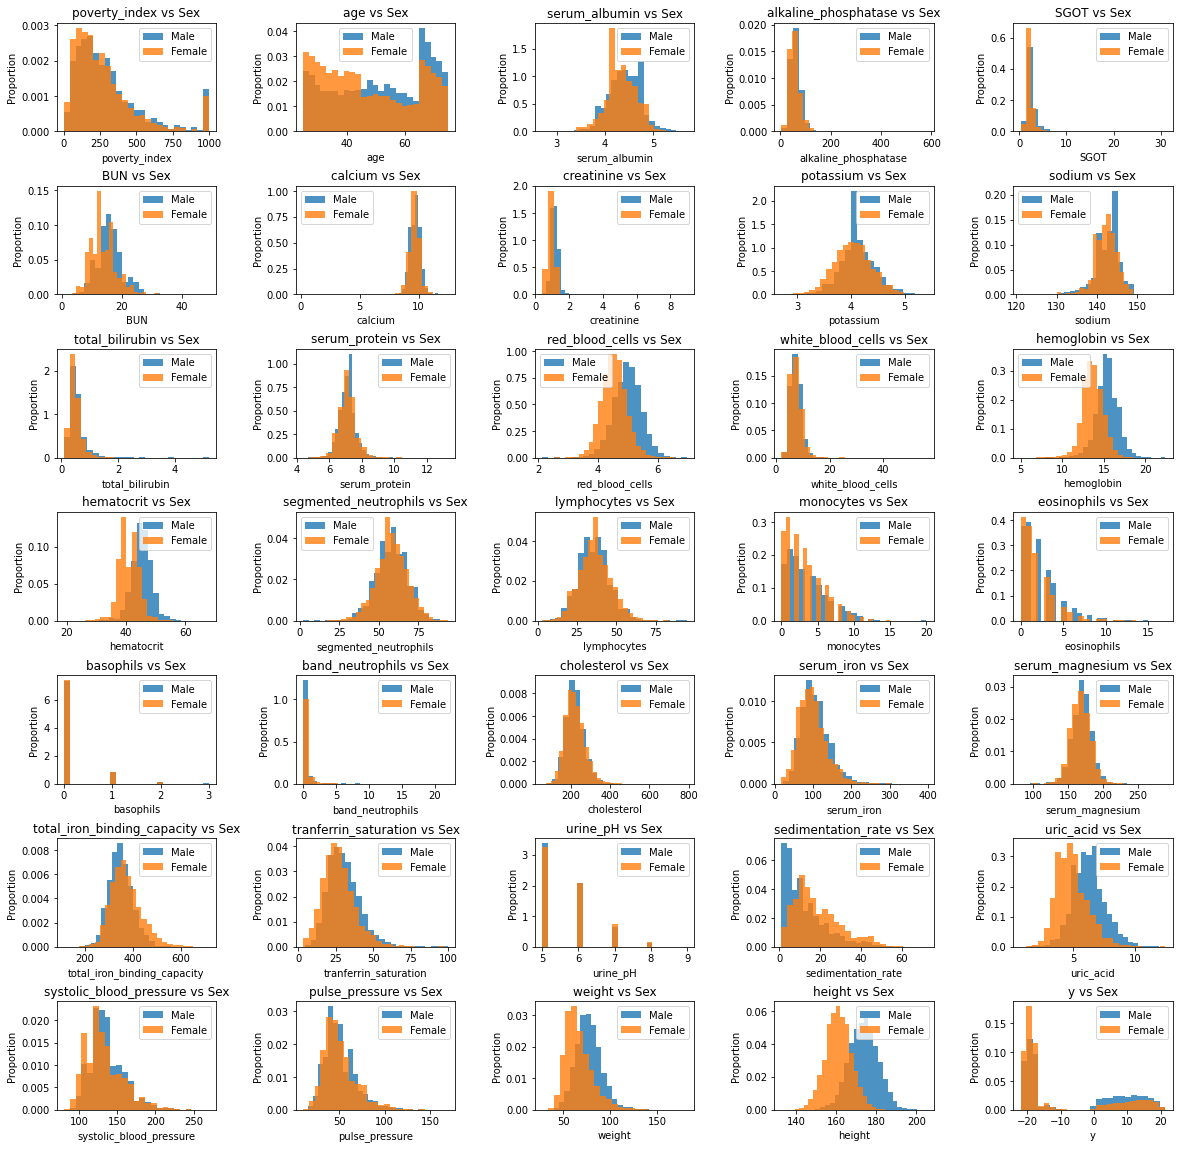

In [ ]:
# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
fig.subplots_adjust(hspace = 0.5, wspace=0.5)

# Go through all the numerical predictors along with y
for i, pred in enumerate((mortality[numerical+['y']]).columns):
    # Plot histograms for that predictor for males
    axes[i].hist(mortality[mortality['sex_isFemale'] == 0][pred], density=True, bins=25, alpha=0.8, label='Male')
    # Plot histograms for that predictor for females
    axes[i].hist(mortality[mortality['sex_isFemale'] == 1][pred], density=True, bins=25, alpha=0.8, label='Female')
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'{pred} vs Sex')
    axes[i].legend()

plt.show()

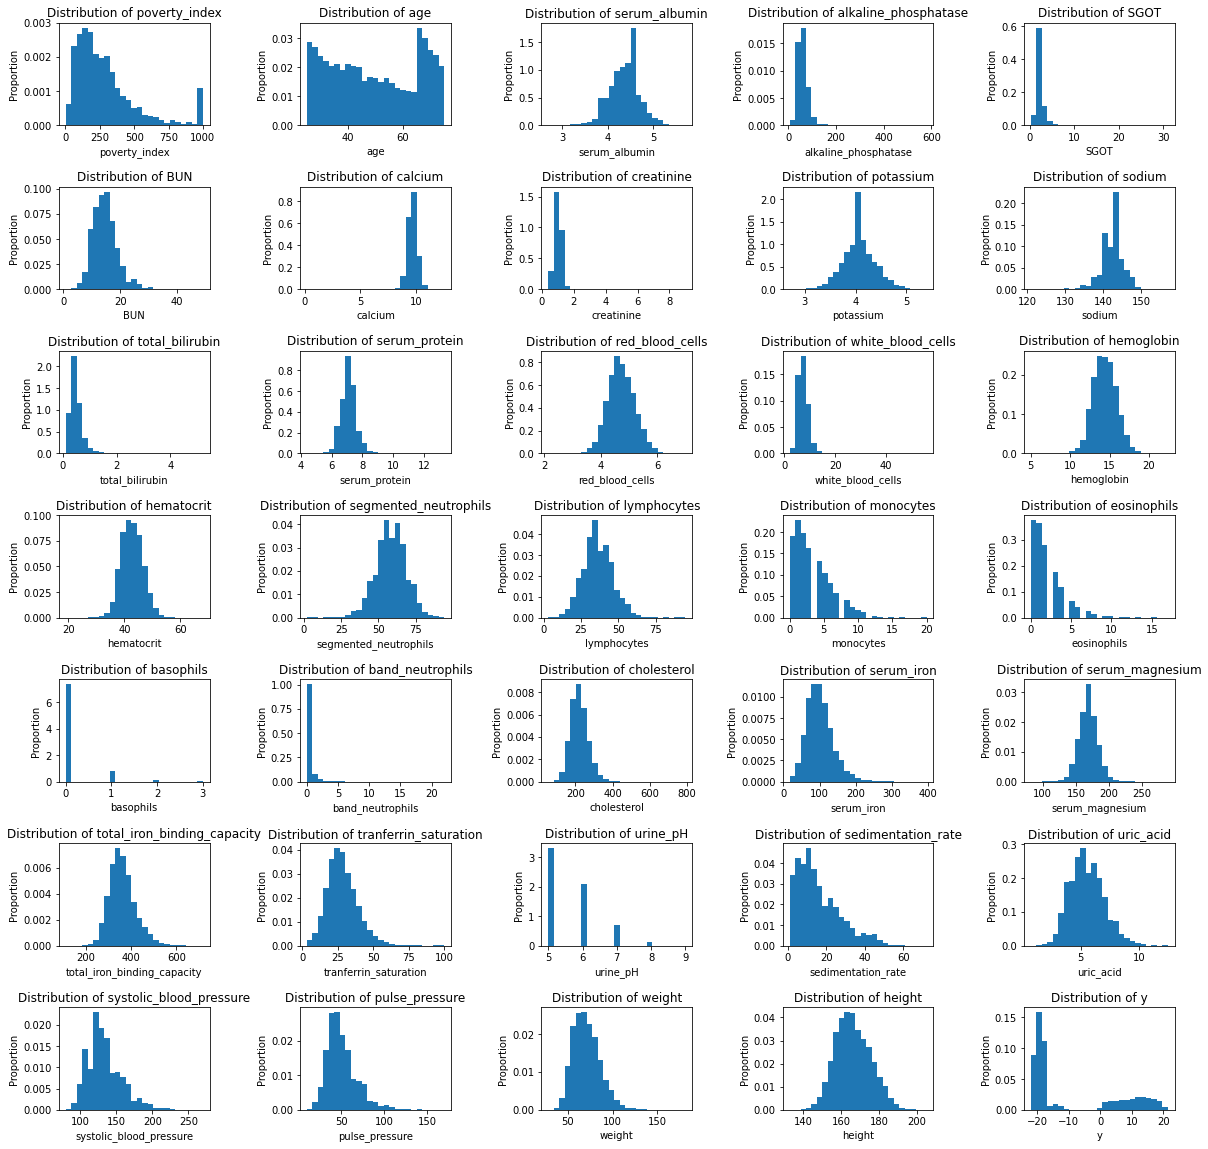

In [ ]:
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
fig.subplots_adjust(hspace = 0.6, wspace=0.6)

for i, pred in enumerate((mortality[numerical+['y']]).columns):
    axes[i].hist(mortality[pred], density=True, bins=25)
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'Distribution of {pred}')

plt.show()

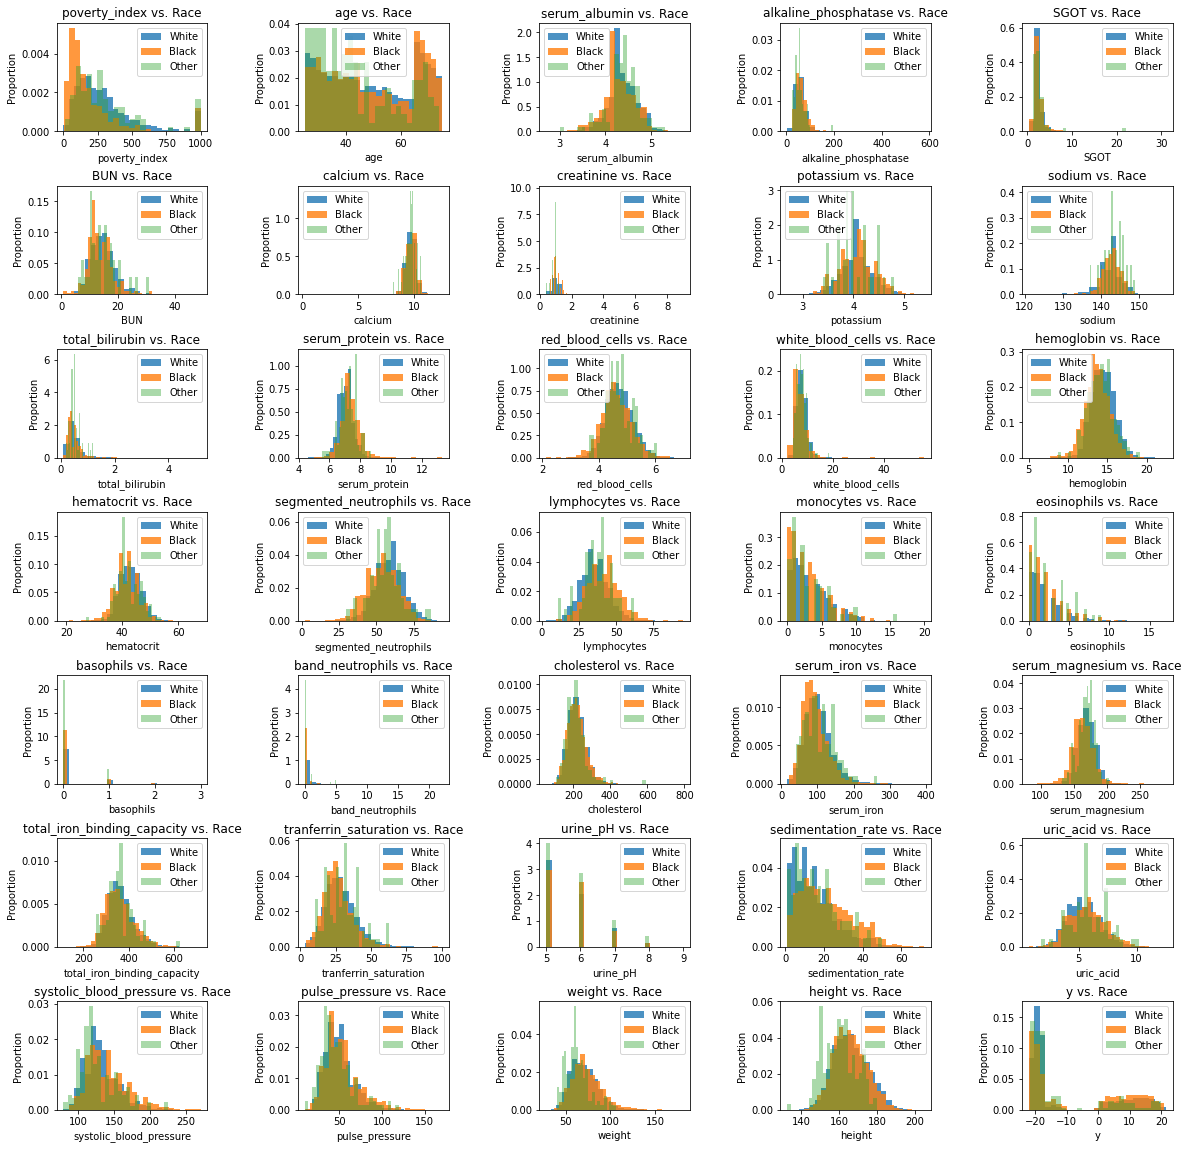

In [ ]:
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
fig.subplots_adjust(hspace = 0.5, wspace=0.6)

for i, pred in enumerate((mortality[numerical+['y']]).columns):
    axes[i].hist(mortality[mortality['race'] == 1][pred], density=True, bins=25, alpha=0.8, label='White')
    axes[i].hist(mortality[mortality['race'] == 2][pred], density=True, bins=25, alpha=0.8, label='Black')
    axes[i].hist(mortality[mortality['race'] == 3][pred], density=True, bins=25, alpha=0.4, label='Other')
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'{pred} vs. Race')
    axes[i].legend()

plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

In [ ]:
# Identify predictor and response variables
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']
X = mortality[numerical]
y = mortality['y']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_seed)

# Impute missing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Baseline multiple linear regression model (we will use more complex methods later on)
regression_baseline = LinearRegression()
regression_baseline.fit(X_train_imputed, y_train)

y_pred_train = regression_baseline.predict(X_train_imputed)
y_pred_test = regression_baseline.predict(X_test_imputed)

train_score = mean_squared_error(y_train, y_pred_train)
test_score = mean_squared_error(y_test, y_pred_test)

print(f"MSE score on the training set is {train_score:.4f}")
print(f"MSE score on the test set is {test_score:.4f}")

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared score on the training set is {r2_train:.4f}")
print(f"R-squared score on the test set is {r2_test:.4f}")

MSE score on the training set is 138.3733
MSE score on the test set is 135.4521
R-squared score on the training set is 0.3338
R-squared score on the test set is 0.3416


In [ ]:
# Now predicting off of the absolute value of the response variable
y_train_abs = abs(y_train)
y_test_abs = abs(y_test)

regression_abs = LinearRegression()
regression_abs.fit(X_train_imputed, y_train_abs)

y_pred_train = regression_abs.predict(X_train_imputed)
y_pred_test = regression_abs.predict(X_test_imputed)

train_score = mean_squared_error(y_train_abs, y_pred_train)
test_score = mean_squared_error(y_test_abs, y_pred_test)

print(f"MSE score on the training set is {train_score:.4f}")
print(f"MSE score on the test set is {test_score:.4f}")

r2_train = r2_score(y_train_abs, y_pred_train)
r2_test = r2_score(y_test_abs, y_pred_test)

print(f"R-squared score on the training set is {r2_train:.4f}")
print(f"R-squared score on the test set is {r2_test:.4f}")

MSE score on the training set is 20.5182
MSE score on the test set is 20.9607
R-squared score on the training set is 0.2578
R-squared score on the test set is 0.2423


ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

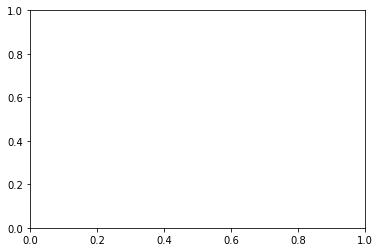

In [ ]:
# multiple polynomial linear regression model
# finds the best polynomial using cross validation and compares using y vs abs(y)


X_train_imputed, x_val, y_train, y_val = train_test_split(X_train_imputed,y_train,train_size=0.80,random_state=random_seed)

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 4

# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

# Loop through the degrees of the polynomial to create different models
for d in range(1,maxdeg):
    
    # Compute the polynomial features for the current degree 
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(X_train_imputed)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    
    # Initialize a linear regression model
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train)
    
    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val, y_val_pred))
    
# Plot the errors as a function of increasing d value to visualise the training 
# and validation errors
fig, ax = plt.subplots()

# Plot the training error with labels
ax.plot(np.arange(0,maxdeg), training_error, label='training error')

# Plot the validation error with labels
ax.plot(np.arange(0,maxdeg), validation_error, label='validation error')

# Set the plot labels, title, and legends
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Validation MSE vs Training MSE for polynomial regression models up to degree 30')
ax.legend(loc = 'best')
plt.show();

    
# Compute the best degree, which is the model with the 
# lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)

# Print the degree of the best model computed above
print("The degree for which the validation error is lowest is",best_degree)

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Normalize the training and test data
# Normalizing the data generally speeds up learning and leads to faster convergence.
X_train_norm = normalize(X_train_imputed)
X_test_norm = normalize(X_test_imputed)

In [ ]:
# Sequential models are models where we define our layers one after another
deepnn = Sequential()
# The output of one layer serves as the input for the next
# We are adding three layers of neurons 
# The activation function is ReLU, Rectified Linear Units
# This takes all the values and normalizes them on a scale from 0 to 1
# The ReLU algorithm basically assigns a value to either 0 or 1, depending which it is closer to
# There will be 34 neurons in this layer 
# Since this is the input layer, we want the input shape to be the number of columns we have
deepnn.add(Dense(34, activation="relu", input_shape=(X_train_norm[0].shape)))
# There will be 34 neurons in this layer 
deepnn.add(Dense(34, activation="relu"))
# There will be 1 neuron in this layer since we want to output a single value as the prediction
deepnn.add(Dense(1))
# Now we want to compile our model
# The optimizer will be adam and the loss function will be mean squared error
deepnn.compile(optimizer="adam", loss="mse", metrics=["mse"])

In [ ]:
num_epochs = 100
# Now we want to fit our model on the training data over 100 epochs
# Verbose will just output the metrics after each round of training
# Validation data is the data on which to evaluate model metrics at the end of each epoch
# The model will not be trained on this data
logs = deepnn.fit(X_train_norm, y_train, epochs=num_epochs, batch_size=1, verbose=True, validation_data=(X_test_norm, y_test))

Epoch 1/100
11525/11525 [==============================] - 22s 2ms/step - loss: 179.8666 - mse: 179.8666 - val_loss: 147.9027 - val_mse: 147.9027
Epoch 2/100
11525/11525 [==============================] - 25s 2ms/step - loss: 150.4411 - mse: 150.4411 - val_loss: 145.9157 - val_mse: 145.9157
Epoch 3/100
11525/11525 [==============================] - 27s 2ms/step - loss: 145.9144 - mse: 145.9144 - val_loss: 139.6767 - val_mse: 139.6767
Epoch 4/100
11525/11525 [==============================] - 27s 2ms/step - loss: 143.6115 - mse: 143.6115 - val_loss: 148.6397 - val_mse: 148.6397
Epoch 5/100
11525/11525 [==============================] - 24s 2ms/step - loss: 141.8694 - mse: 141.8694 - val_loss: 140.8700 - val_mse: 140.8700
Epoch 6/100
11525/11525 [==============================] - 25s 2ms/step - loss: 141.1602 - mse: 141.1602 - val_loss: 141.2979 - val_mse: 141.2979
Epoch 7/100
11525/11525 [==============================] - 27s 2ms/step - loss: 140.1763 - mse: 140.1763 - val_loss: 134.311

In [ ]:
print(deepnn.evaluate(X_train_norm, y_train))
print(deepnn.evaluate(X_test_norm, y_test))

361/361 [==============================] - 1s 2ms/step - loss: 130.7589 - mse: 130.7589
[130.75885009765625, 130.75885009765625]
91/91 [==============================] - 0s 2ms/step - loss: 130.4285 - mse: 130.4285
[130.42845153808594, 130.42845153808594]


In [ ]:
logs.history

{'loss': [179.8665771484375,
  150.44107055664062,
  145.91439819335938,
  143.61154174804688,
  141.86940002441406,
  141.1602325439453,
  140.17625427246094,
  139.95521545410156,
  139.24403381347656,
  139.52630615234375,
  138.63978576660156,
  138.8204345703125,
  138.10198974609375,
  137.83212280273438,
  137.85862731933594,
  137.4945068359375,
  138.1084747314453,
  137.5380096435547,
  136.921875,
  136.84303283691406,
  137.1918487548828,
  136.21966552734375,
  136.85939025878906,
  136.7831268310547,
  136.24871826171875,
  136.1106414794922,
  135.67864990234375,
  136.0667266845703,
  135.46905517578125,
  135.7032928466797,
  135.7361602783203,
  135.72018432617188,
  135.76202392578125,
  135.64344787597656,
  135.47579956054688,
  135.7264862060547,
  135.39002990722656,
  135.4955596923828,
  134.73802185058594,
  134.80796813964844,
  134.52687072753906,
  135.0089111328125,
  134.86212158203125,
  134.89492797851562,
  134.78952026367188,
  134.71624755859375,
  1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train_scaled = X_train_norm
X_test_scaled = X_test_norm

tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
print(mean_squared_error(y_train, tree.predict(X_train_scaled)))
print(mean_squared_error(y_test, tree.predict(X_test_scaled)))

2.5188790726362893e-32
274.1747530889733


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30, random_state=0)
model.fit(X_train_scaled, y_train)
print(mean_squared_error(y_train, model.predict(X_train_scaled)))
print(mean_squared_error(y_test, model.predict(X_test_scaled)))

21.38326613971927
139.75947544394793


In [ ]:
feature_list = list(X_train.columns)
feature_importance = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_importance)

age                            0.323
serum_albumin                  0.037
white_blood_cells              0.031
systolic_blood_pressure        0.031
serum_magnesium                0.031
sedimentation_rate             0.030
cholesterol                    0.029
weight                         0.027
pulse_pressure                 0.025
poverty_index                  0.025
serum_iron                     0.024
total_iron_binding_capacity    0.023
serum_protein                  0.023
urine_pH                       0.023
red_blood_cells                0.022
sodium                         0.022
tranferrin_saturation          0.022
hematocrit                     0.022
height                         0.020
hemoglobin                     0.020
uric_acid                      0.019
calcium                        0.018
alkaline_phosphatase           0.018
SGOT                           0.017
total_bilirubin                0.015
lymphocytes                    0.014
segmented_neutrophils          0.014
B

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_imputed)

X_train_scaled = scaler.transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
print(mean_squared_error(y_train, tree.predict(X_train_scaled)))
print(mean_squared_error(y_test, tree.predict(X_test_scaled)))

4.5449339788872177e-32
282.1247725619595


In [ ]:

model = RandomForestRegressor(n_estimators=30, random_state=0)
model.fit(X_train_scaled, y_train)
print(mean_squared_error(y_train, model.predict(X_train_scaled)))
print(mean_squared_error(y_test, model.predict(X_test_scaled)))

20.91128971808703
134.2779648734574


In [ ]:
feature_list = list(X_train.columns)
feature_importance = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_importance)

age                            0.351
height                         0.039
cholesterol                    0.039
weight                         0.039
poverty_index                  0.038
serum_magnesium                0.035
white_blood_cells              0.034
systolic_blood_pressure        0.034
sedimentation_rate             0.031
hemoglobin                     0.029
total_iron_binding_capacity    0.028
red_blood_cells                0.028
serum_protein                  0.027
tranferrin_saturation          0.026
serum_iron                     0.025
pulse_pressure                 0.025
serum_albumin                  0.022
hematocrit                     0.020
SGOT                           0.015
alkaline_phosphatase           0.015
uric_acid                      0.013
calcium                        0.010
urine_pH                       0.009
total_bilirubin                0.009
segmented_neutrophils          0.009
lymphocytes                    0.009
monocytes                      0.008
e

In [ ]:
# Sequential models are models where we define our layers one after another
deepnn_ = Sequential()
# The output of one layer serves as the input for the next
# We are adding three layers of neurons 
# The activation function is ReLU, Rectified Linear Units
# This takes all the values and normalizes them on a scale from 0 to 1
# The ReLU algorithm basically assigns a value to either 0 or 1, depending which it is closer to
# There will be 34 neurons in this layer 
# Since this is the input layer, we want the input shape to be the number of columns we have
deepnn_.add(Dense(34, activation="relu", input_shape=(X_train_scaled[0].shape)))
# There will be 34 neurons in this layer 
deepnn_.add(Dense(34, activation="relu"))
# There will be 1 neuron in this layer since we want to output a single value as the prediction
deepnn_.add(Dense(1))
# Now we want to compile our model
# The optimizer will be adam and the loss function will be mean squared error
deepnn_.compile(optimizer="adam", loss="mse")

In [ ]:
X_train_scaled = X_train_norm
X_test_scaled = X_test_norm

num_epochs = 100
# Now we want to fit our model on the training data over 100 epochs
# Verbose will just output the metrics after each round of training
# Validation data is the data on which to evaluate model metrics at the end of each epoch
# The model will not be trained on this data
logs_ = deepnn_.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=32, verbose=True, validation_data=(X_test_scaled, y_test))

Epoch 1/100
361/361 [==============================] - 1s 2ms/step - loss: 222.7163 - val_loss: 200.5548
Epoch 2/100
361/361 [==============================] - 1s 2ms/step - loss: 196.5696 - val_loss: 185.5157
Epoch 3/100
361/361 [==============================] - 1s 2ms/step - loss: 177.7668 - val_loss: 163.5332
Epoch 4/100
361/361 [==============================] - 1s 2ms/step - loss: 160.2893 - val_loss: 151.7935
Epoch 5/100
361/361 [==============================] - 1s 2ms/step - loss: 153.0667 - val_loss: 148.0181
Epoch 6/100
361/361 [==============================] - 1s 2ms/step - loss: 149.9161 - val_loss: 146.6696
Epoch 7/100
361/361 [==============================] - 1s 2ms/step - loss: 147.8201 - val_loss: 143.4795
Epoch 8/100
361/361 [==============================] - 1s 2ms/step - loss: 146.5161 - val_loss: 142.0864
Epoch 9/100
361/361 [==============================] - 1s 2ms/step - loss: 144.8027 - val_loss: 140.7598
Epoch 10/100
361/361 [==============================] -

In [ ]:
print(deepnn_.evaluate(X_train_scaled, y_train))
print(deepnn_.evaluate(X_test_scaled, y_test))

361/361 [==============================] - 0s 1ms/step - loss: 131.8332
131.83322143554688
91/91 [==============================] - 0s 1ms/step - loss: 130.7235
130.72348022460938


In [ ]:
# your code here
# Standardize X_train and X_test
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_stand = scaler.fit(X_train_imputed).transform(X_train_imputed)
X_test_stand = scaler.fit(X_train_imputed).transform(X_test_imputed)

k_list = list(range(1, 35))
cross_validation_error = []

# Fit PCA for each k
for k in k_list:
    # Fit PCA for n_components = k
    pca = PCA(n_components=k).fit(X_train_stand)
    
    # Apply PCA transformation to standardized X_train
    X_pca = pca.transform(X_train_stand)
    
    # Cross validate on linear regression
    lin_reg = LinearRegression()
    mse_score = cross_validate(lin_reg, X_pca, y_train, scoring="neg_mean_squared_error", cv=10, return_train_score =True) 
    cross_validation_error.append(-1 * np.mean(mse_score["test_score"]))

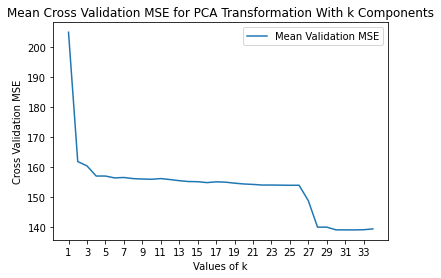

In [ ]:
# Generate plot
plt.plot(k_list, cross_validation_error, label='Mean Validation MSE')
plt.xlabel('Values of k')
plt.xticks(np.arange(1,35,2))
plt.ylabel('Cross Validation MSE')
plt.title('Mean Cross Validation MSE for PCA Transformation With k Components')
plt.legend()
plt.show()

In [ ]:
# Report best k
best_mse_idx = cross_validation_error.index(min(cross_validation_error))
best_k = k_list[best_mse_idx]
print(f"The best k based on the mean cross validation MSE is k={best_k}")

The best k based on the mean cross validation MSE is k=32


In [ ]:
# your code here
# Fit PCA transformation with best_k
pca = PCA(n_components=best_k).fit(X_train_stand)
X_train_pca = pca.transform(X_train_stand)
X_test_pca = pca.transform(X_test_stand)

# Fit linear regression model to PCA-transformed components
linear = LinearRegression()
linear.fit(X_train_pca, y_train)
y_pred_test = linear.predict(X_test_pca)

# Calculate and report R^2
r2 = r2_score(y_test, y_pred_test)
print(f"The linear regression model fitted with PCA-transformed components has an R^2 score of {r2:.4f}")

The linear regression model fitted with PCA-transformed components has an R^2 score of 0.3416


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
X_df = pd.DataFrame(X_train_imputed)
vif_data["feature"] = X_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(len(X_df.columns))]
  
vif_data

,feature,VIF
0,0,3.213
1,1,19.116
2,2,379.575
3,3,15.071
4,4,8.194
5,5,67.126
6,6,1044.612
7,7,152.128
8,8,695.403
9,9,10346.412


In [ ]:
#num_epochs = 100
# Now we want to fit our model on the training data over 100 epochs
# Verbose will just output the metrics after each round of training
#logs = deepnn.fit(X_train_norm, y_train, epochs=num_epochs, batch_size=1, verbose=True, validation_data=(X_test_norm, y_test))

In [ ]:
# create/fit the 'full' pca transformation
pca = PCA().fit(X_df)

# apply the pca transformation to the full predictor set
pcaX = pca.transform(X_df)

# convert to a data frame
pcr_columns = []
for i in range(1,35):
  pcr_columns.append(f"PCA{i}")

pcaX_df = pd.DataFrame(pcaX, columns=pcr_columns)

# here are the weighting (eigen-vectors) of the variables (first 2 at least)
print("First PCA Component (w1):", pca.components_[0,:])
print("Second PCA Component (w2):", pca.components_[1,:])

display(pcaX_df)

First PCA Component (w1): [ 9.99752363e-01 -2.74510116e-03  1.06319727e-04 -2.14721014e-03
 -2.86415186e-05 -6.29238234e-07 -8.28923950e-06 -1.61904786e-08
  7.51706546e-08  1.16724713e-07  2.90706420e-06 -2.00461422e-04
  6.31171233e-05  9.13325218e-05  5.62538520e-04  1.21238674e-03
  4.64033740e-04 -4.29843569e-04 -3.14041441e-05  3.86390329e-05
  1.42784080e-06 -3.26804142e-05  4.49199912e-03  1.38256760e-02
  2.39003383e-03 -5.00505689e-03  4.05848643e-03  4.18870519e-06
 -6.26829808e-03  2.99300253e-05 -1.06936155e-02 -6.71168146e-03
 -1.11479988e-03  4.72384270e-03]
Second PCA Component (w2): [ 4.24684816e-03 -6.03197922e-02  6.90235314e-04 -2.77771666e-03
  2.60452680e-04  1.99430487e-04  4.44909041e-04  4.14986618e-06
  8.67701639e-06  7.80498581e-05 -5.32258008e-05  1.31015266e-03
 -1.45004784e-05  2.82143641e-03 -1.77215461e-03 -4.01422719e-03
  2.12884542e-03 -1.72922362e-03  4.62451533e-05 -5.52361911e-04
  6.25884362e-06  1.46899785e-04  1.21848247e-01  1.41582563e-02
 -7

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34
0,0.495,4.048,19.129,6.032,-24.827,18.326,-26.241,0.653,3.160,-0.149,-1.242,7.134,11.146,-2.111,-0.159,-0.223,-1.688,-0.258,-2.075,-3.153,-0.194,-0.722,-0.074,-0.498,0.143,-0.036,-0.299,-0.616,-0.103,0.113,-4.426e-01,0.220,-0.002,-1.813e-02
1,-53.979,7.312,68.193,9.025,-34.115,-14.796,14.145,63.559,-1.611,-3.278,-0.128,1.474,-7.425,3.493,-0.369,-0.202,-0.669,-0.397,0.202,0.528,0.426,-0.125,-0.106,-0.634,-0.122,0.114,-0.414,0.185,-0.016,0.196,4.628e-02,-0.034,-0.007,-5.310e-03
2,27.638,0.873,154.054,23.275,-54.942,-0.295,-18.404,-7.159,29.600,-7.446,-2.553,3.555,6.224,3.396,-1.490,3.056,1.491,0.091,-0.642,0.579,-0.358,0.399,-0.055,1.245,-0.628,0.111,-0.230,-0.057,-0.117,0.210,-1.079e-01,-0.104,0.026,4.134e-03
3,0.271,-2.352,-42.866,7.338,-25.374,16.797,-3.415,5.353,7.057,12.041,22.477,-10.255,-5.066,3.692,0.093,-3.032,1.459,-0.397,-0.563,2.340,0.147,-0.892,-0.250,-0.609,-0.092,0.231,0.201,-0.017,-0.136,0.035,-1.419e-01,0.293,0.041,-6.067e-02
4,0.509,6.125,40.029,8.959,-36.790,-8.510,3.755,-13.577,-9.631,-1.757,3.712,-1.258,-3.998,-1.149,-2.056,1.746,3.281,0.632,0.275,1.394,0.859,0.620,-0.012,0.389,-0.342,-0.201,-0.546,-0.194,-0.112,-0.037,-3.435e-02,-0.108,0.011,1.847e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11520,0.391,4.657,15.505,8.277,-32.349,-9.532,15.529,-17.178,14.982,-0.893,-19.917,4.619,-10.279,-2.730,3.748,1.728,-4.565,-0.075,2.479,-0.527,-0.094,1.018,-1.030,-0.541,0.946,-0.143,0.299,-0.213,-0.230,0.078,5.870e-01,0.398,0.058,7.408e-02
11521,-84.539,-103.032,-14.831,37.820,-18.738,-13.245,11.461,-3.787,17.983,5.104,-1.246,-7.120,-1.008,2.343,0.017,0.447,1.377,-5.799,0.133,-0.092,0.362,-0.373,-0.044,-0.018,0.785,0.092,-0.013,-0.013,-0.011,-0.062,-3.167e-02,-0.006,0.001,4.726e-03
11522,-170.489,-5.978,-51.517,7.345,-11.104,8.338,-3.608,1.111,-3.545,-10.768,1.765,0.751,-1.808,1.777,-0.012,-0.798,-0.306,-0.191,-0.063,-0.034,-0.069,0.013,-0.025,-0.621,-0.122,0.217,0.245,-0.113,-0.008,-0.172,-1.130e-02,-0.021,-0.002,-3.679e-04
11523,-51.302,1.201,-8.582,8.680,-30.723,2.502,0.505,3.487,8.744,11.948,-2.646,12.279,-3.249,-1.274,0.168,-3.214,-0.885,-0.417,0.001,0.034,0.280,-0.176,-0.065,-0.709,-0.103,-0.780,-0.023,0.106,-0.015,0.294,2.233e-04,-0.014,0.004,3.204e-03


Variance explained by each component: [8.30376218e-01 5.44680380e-02 5.00131472e-02 2.22384181e-02
 1.76790303e-02 6.09002412e-03 5.49771293e-03 4.18345250e-03
 2.91775642e-03 1.89137154e-03 1.63068436e-03 1.19578149e-03
 1.03462756e-03 2.56026838e-04 1.19007500e-04 8.55753271e-05
 8.38940629e-05 7.80852877e-05 4.14667851e-05 3.91341064e-05
 2.07333025e-05 1.53274906e-05 1.37214450e-05 1.17359343e-05
 6.97890572e-06 4.17962630e-06 2.00178329e-06 1.88326980e-06
 1.61591694e-06 9.32580300e-07 5.25794740e-07 4.91857661e-07
 2.79506152e-07 1.40409178e-07]


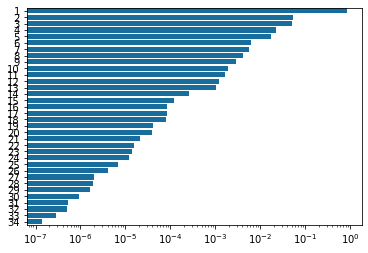

In [ ]:
print("Variance explained by each component:", pca.explained_variance_ratio_)

blue = sns.color_palette("colorblind")[0]
sns.barplot(y=list(range(1,35)), x=pca.explained_variance_ratio_, orient="h", color=blue)
plt.xscale("log")

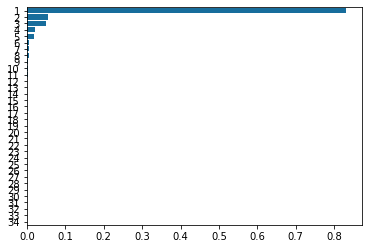

In [ ]:
_ = sns.barplot(y=list(range(1,35)), x=pca.explained_variance_ratio_, orient="h", color=blue)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=24ab17b8-b2f8-4eb1-897f-b86e4cf16ad8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>